# Differential energy spectrum of final state partons [dN/dE]

## Preparations
Please provide full path of final state partons data files  

In [9]:
# Set File Paths
# Please set the path for data files (final state partons) Vacuum case
file_pp = '/home/jetscape-user/X-SCAPE/build/test_out_PGun_MATTER_Vacuum_final_state_partons.dat'

# Please set the path for data files (final state partons) in-medium case 
file_pbpb = '/home/jetscape-user/X-SCAPE/build/test_out_PGun_Hydro_MATTER_LBT_final_state_partons.dat'
file_pbpb2 = file_pbpb
#file_pbpb2 = '/home/jetscape-user/JETSCAPE/build/test_out_PGun_Hydro_MATTER_LBT_alphas0p3_final_state_partons.dat'

# Number of events generated by JETSCAPE
n_ev_pp = 1000
n_ev_pbpb = 1000

In [10]:
# preperations
import numpy as np
import matplotlib.pyplot as plt

# pi and 2pi 
pi = 3.1415926
twopi = 2.0*pi

# define plot style
width = 0.05
plotMarkerSize = 8
labelfontsize = 15
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [6., 4.5]
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['xtick.top'] = True
mpl.rcParams['xtick.labelsize'] = 15
mpl.rcParams['xtick.major.width'] = 1.0
mpl.rcParams['xtick.minor.width'] = 0.8
mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['xtick.direction'] = "in"
mpl.rcParams['ytick.right'] = True
mpl.rcParams['ytick.labelsize'] = 15
mpl.rcParams['ytick.major.width'] = 1.0
mpl.rcParams['ytick.minor.width'] = 0.8
mpl.rcParams['ytick.minor.visible'] = True
mpl.rcParams['ytick.direction'] = "in"
mpl.rcParams['legend.fontsize'] = 15
mpl.rcParams['legend.numpoints'] = 1
mpl.rcParams['font.size'] = 15
mpl.rcParams['savefig.format'] = "pdf"

In [11]:
def ratio_error(v1,e1,v2,e2):
  #v1, e1: numerator value and error
  #v2, e2: denominator value and error  
  error1 = e1/v2
  error2 = (e2/v2)*(v1/v2)
  error = np.sqrt(error1*error1+error2*error2)
  return error

504 1.33205 24.4639
[  1.           3.02040816   5.04081633   7.06122449   9.08163265
  11.10204082  13.12244898  15.14285714  17.16326531  19.18367347
  21.20408163  23.2244898   25.24489796  27.26530612  29.28571429
  31.30612245  33.32653061  35.34693878  37.36734694  39.3877551
  41.40816327  43.42857143  45.44897959  47.46938776  49.48979592
  51.51020408  53.53061224  55.55102041  57.57142857  59.59183673
  61.6122449   63.63265306  65.65306122  67.67346939  69.69387755
  71.71428571  73.73469388  75.75510204  77.7755102   79.79591837
  81.81632653  83.83673469  85.85714286  87.87755102  89.89795918
  91.91836735  93.93877551  95.95918367  97.97959184 100.        ]
[2.02040816 2.02040816 2.02040816 2.02040816 2.02040816 2.02040816
 2.02040816 2.02040816 2.02040816 2.02040816 2.02040816 2.02040816
 2.02040816 2.02040816 2.02040816 2.02040816 2.02040816 2.02040816
 2.02040816 2.02040816 2.02040816 2.02040816 2.02040816 2.02040816
 2.02040816 2.02040816 2.02040816 2.02040816 2.02040

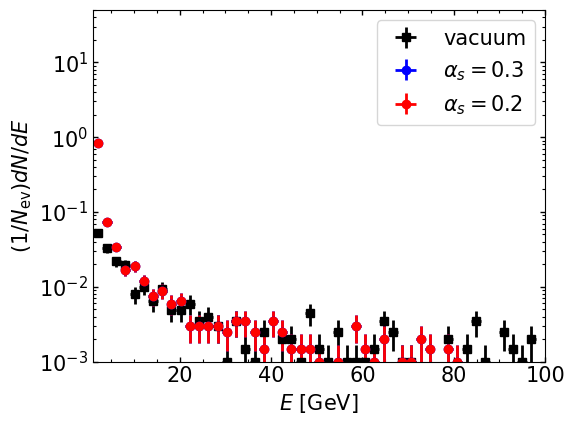

In [12]:
# Load files
data_pp = np.loadtxt(file_pp, comments='#')
data_pbpb = np.loadtxt(file_pbpb, comments='#')
data_pbpb2 = np.loadtxt(file_pbpb2, comments='#')

jet_pt_pp_in = data_pp[:,3]
jet_pt_pbpb_in = data_pbpb[:,3]
jet_pt_pbpb_in2 = data_pbpb2[:,3]

print(len(jet_pt_pp_in), jet_pt_pp_in[0], jet_pt_pp_in[1])

# bin settings
pt_min = 1
pt_max = 100
pt_bins = np.linspace(pt_min, pt_max,50)

# Fill Histogram 
n_pp, pt = np.histogram(jet_pt_pp_in, bins=pt_bins )
n_pbpb, pt = np.histogram(jet_pt_pbpb_in, bins=pt_bins )
n_pbpb2, pt = np.histogram(jet_pt_pbpb_in2, bins=pt_bins )

# Statistical Errors y-axis
err_n_pp = np.sqrt(n_pp)
err_n_pbpb = np.sqrt(n_pbpb)
err_n_pbpb2 = np.sqrt(n_pbpb2)

# bin width x-axis
dpt = (pt[1:]-pt[:-1])
print(pt)
print(dpt)

# bin center x-axis
pt = pt[0:-1] + 0.5*dpt

# Construct y-axis Spectrum (scaled) 
dn_dpt_pp = n_pp/n_ev_pp/dpt
dn_dpt_pbpb = n_pbpb/n_ev_pbpb/dpt
dn_dpt_pbpb2 = n_pbpb2/n_ev_pbpb/dpt

# Error bars y-axis 
err_dn_dpt_pp = err_n_pp/n_ev_pp/dpt
err_dn_dpt_pbpb = err_n_pbpb/n_ev_pbpb/dpt
err_dn_dpt_pbpb2 = err_n_pbpb2/n_ev_pbpb/dpt

# Generate Plots
fig = plt.figure()

plt.errorbar(pt, dn_dpt_pp, fmt='s', label="vacuum",
             xerr=0.5*dpt, yerr=err_dn_dpt_pp, color='black')

plt.errorbar(pt, dn_dpt_pbpb2, fmt='o', label=r"$\alpha_{s} = 0.3$",
             xerr=0.5*dpt, yerr=err_dn_dpt_pbpb2, color='blue')
plt.errorbar(pt, dn_dpt_pbpb, fmt='o', label=r"$\alpha_{s} = 0.2$",
             xerr=0.5*dpt, yerr=err_dn_dpt_pbpb, color='red')

#axes setting
plt.yscale('log')
plt.legend(loc=0)
plt.xlabel(r"$E$ [GeV]")
plt.ylabel(r"$(1/N_{\mathrm{ev}})dN/dE$")
plt.xlim(pt_min,pt_max)
#y_min = dn_dpt_pbpb[-1]*0.5
#if y_min < 0:
#  y_min = 0.0015

#y_max = (dn_dpt_pp[0]+err_dn_dpt_pp[0])*2.0

ymin=0.001
ymax=50
plt.ylim(ymin,ymax)
#plt.text(pt_min+1,y_min*1.2, '5.02 TeV')

# save plots
plt.tight_layout()
plt.savefig('dNdE_Spectra')
